In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the dataset into python environment

In [2]:
# Loading the data
df = pd.read_csv(r'G:\DSA\Activity\Case Study 6\titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Make ‘PassengerId’ as the index column

In [3]:
df.set_index('PassengerId',inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

In [4]:
df.shape

(891, 11)

In [5]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4. Fill in all the missing values present in all the columns in the dataset

In [8]:
df.isna().sum()  # Checking for the presence of missing values in the columns

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
print('Percentage of missing values in Age Column: ',100-(df.Age.count()*100/len(df)))
print('Percentage of missing values in Cabin Column: ',100-(df.Cabin.count()*100/len(df)))
print('Percentage of missing values in Embarked Column: ',100-(df.Embarked.count()*100/len(df)))

Percentage of missing values in Age Column:  19.86531986531986
Percentage of missing values in Cabin Column:  77.10437710437711
Percentage of missing values in Embarked Column:  0.22446689113355944


Cabin column has more than 70% missing values. Its better to drop the feature

In [10]:
df.drop('Cabin',axis=1,inplace=True)

In [11]:
df.Embarked.mode()

0    S
dtype: object

Embarked feature contains just two missing values. That is only 0.2% of the the data in the column. So we shall drop the observations

Further, the Name of Passenger and Ticket number has no relation to the survivability which is the target. So Lets drop these columns too

In [12]:
df.dropna(subset=['Embarked'],inplace=True)
# We shall not reset the index after dropping the row, as the data is indexed on passenger id

In [13]:
# Also drop Name and Ticket
df.drop(['Name','Ticket'], axis =1, inplace = True)
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
887,0,2,male,27.0,0,0,13.00,S
888,1,1,female,19.0,0,0,30.00,S
889,0,3,female,NaN,1,2,23.45,S
890,1,1,male,26.0,0,0,30.00,C
891,0,3,male,32.0,0,0,7.75,Q


In [14]:
# Now we need to handle the missing values in Age column
# Lets see how the age is distributed

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

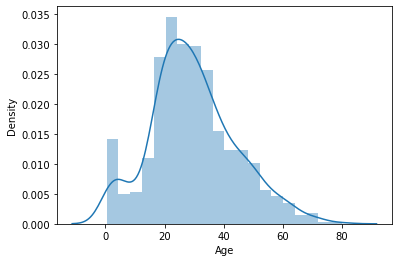

In [15]:
sns.distplot(df.Age)

In [16]:
# The distribution doesnt seem to be highly skewed. So lets replace missing values with mean
# Futher we may classify the passengers according to there passenger class and 
#assign mean age value of each class to the missing values

In [17]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.105543
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [18]:
def age_assign(sliced):
    pc= sliced[0]
    age=sliced[1]
    if pd.isnull(age):
        if pc==1:
            return(38)
        elif pc==2:
            return(30)
        else:
            return(25)
    else:
        return age

In [19]:
df['Age']=df[['Pclass','Age']].apply(age_assign,axis=1)

In [20]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,25.0,0,0,8.4583,Q
7,0,1,male,54.0,0,0,51.8625,S
8,0,3,male,2.0,3,1,21.0750,S
9,1,3,female,27.0,0,2,11.1333,S


In [21]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 5. Check and handle outliers in at least 3 columns in the dataset

In [22]:
df.shape

(889, 8)

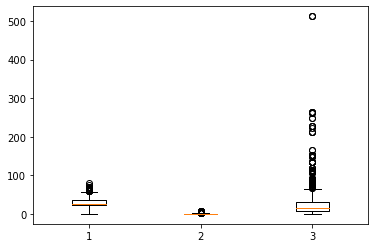

In [23]:
plt.boxplot([df.Age,df.SibSp,df.Fare])
plt.show()

<AxesSubplot:xlabel='Age'>

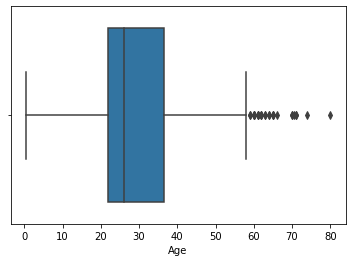

In [24]:
sns.boxplot(x='Age',data=df)

<AxesSubplot:xlabel='SibSp'>

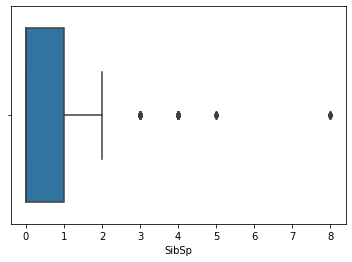

In [25]:
sns.boxplot(x='SibSp',data=df)

<AxesSubplot:xlabel='Fare'>

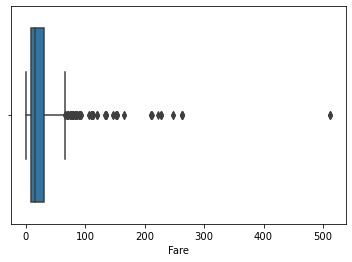

In [26]:
sns.boxplot(x='Fare',data=df)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


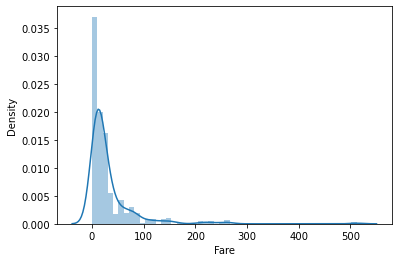

In [27]:
sns.distplot(df.Fare)
plt.show()

Age of Passengers range between 0 and 80. Even though passengers of age 60 and above are rare on the dataset, this doesnt seem odd. So keeping the values of age as it is.

Similarly with SibSp column, since the number of Siblings+Spouse values seems reasonably natural, this too can be let as it is.

However in the Fare column, only one value looks extremely as high as 500. This seems odd.So the extreme shall be replaced by the median value as the fare seems kind of left skewed.

<AxesSubplot:xlabel='Fare'>

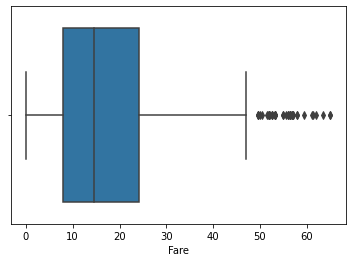

In [28]:
Q1 = np.percentile(df['Fare'],25)
median = np.percentile(df['Fare'],50)
Q3 = np.percentile(df['Fare'],75)
IQR = Q3-Q1
outlier_index = df[(df['Fare']>(Q3+1.5*IQR)) | (df['Fare']<(Q1-1.5*IQR))].index
df.loc[list(outlier_index),'Fare']=median
sns.boxplot(x=df.Fare)

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [31]:
X=df.drop('Survived', axis=1)
# no need to perform scaling on Survived column
y=df['Survived']

In [32]:
scale = MinMaxScaler()
scaled = scale.fit_transform(X.select_dtypes(['int64','int32','float64']))
#scaling need to be carried out only on numerical features

features = pd.DataFrame(scaled)
#converting scaled matrix into a dataframe
features.columns=X.select_dtypes(['int64','int32','float64']).columns

In [33]:
#adding the transformed columns values to the X dataframe
features.index=df.index
pd.concat([df,features],axis=1)
X[X.select_dtypes(['int64','int32','float64']).columns]=features
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,1.0,male,0.271174,0.125,0.0,0.111538,S
2,0.0,female,0.472229,0.125,0.0,0.222372,C
3,1.0,female,0.321438,0.000,0.0,0.121923,S
4,0.0,female,0.434531,0.125,0.0,0.816923,S
5,1.0,male,0.434531,0.000,0.0,0.123846,S


In [34]:
# concatenating the features and target columns
final_data=pd.concat([X,y],axis=1)
final_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
1,1.0,male,0.271174,0.125,0.000000,0.111538,S,0
2,0.0,female,0.472229,0.125,0.000000,0.222372,C,1
3,1.0,female,0.321438,0.000,0.000000,0.121923,S,1
4,0.0,female,0.434531,0.125,0.000000,0.816923,S,1
5,1.0,male,0.434531,0.000,0.000000,0.123846,S,0
6,1.0,male,0.308872,0.000,0.000000,0.130128,Q,0
7,0.0,male,0.673285,0.000,0.000000,0.797885,S,0
8,1.0,male,0.019854,0.375,0.166667,0.324231,S,0
9,1.0,female,0.334004,0.000,0.333333,0.171282,S,1


This is the data obtained after re-indexing, dropping irrelevant columns, handling missing values and outliers and Scaling operations

In [35]:
final_data.shape

(889, 8)